<a href="https://colab.research.google.com/github/ankitrai777/EDA-on-Play-Store-App-Review/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [1]:
#Importing important libraries for EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Mounting drive with colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Importing playstore data from drive
ps_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Project : EDA on Play Store App Reviews/Play Store Data.csv')

#Importing User Reviews from drive
ur_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Project : EDA on Play Store App Reviews/User Reviews.csv')

## **Data Exploration**

In [4]:
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
ps_df.shape

(10841, 13)

In [7]:
ps_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [8]:
ps_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# **Data Cleaning**

## **1) Checking for Duplicates**

In [9]:
# Checking for duplicate values
check_dupl = ps_df.duplicated(keep = False).any()
print(check_dupl)

True


In [10]:
# Checking again for the duplictes
ps_df.App.nunique() , ps_df.App.shape

(9660, (10841,))

In [11]:
# Displaying duplicte values
ps_df[ps_df.duplicated(keep = False ) == True].sort_values(by = 'App').head(6)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2256,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8M,"1,000+",Paid,$16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8M,"1,000+",Paid,$16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up


In [12]:
ps_df[ps_df.duplicated(keep = 'first' ) == True].sort_values(by=['App']).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8M,"1,000+",Paid,$16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up
1434,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,15M,"100,000+",Free,0,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up
7035,420 BZ Budeze Delivery,MEDICAL,5.0,2,11M,100+,Free,0,Mature 17+,Medical,"June 6, 2018",1.0.1,4.1 and up


In [13]:
dub_indexes = ps_df.index[ps_df.duplicated(keep = 'first' ) == True]

In [14]:
len(dub_indexes)

483

In [15]:
ps_df = ps_df.drop(dub_indexes)

In [16]:
ps_df.shape

(10358, 13)

In [17]:
ps_df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

## **Now that all duplicate values have been removed, we can proceed for further data cleaning by each column.**

## **1) APP Column**

In [18]:
# Checking for duplicates in the APP Column

ps_df[ps_df.duplicated(['App','Category'] , keep = 'first' )].sort_values(by= 'App').head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5415,365Scores - Live Scores,SPORTS,4.6,666246,25M,"10,000,000+",Free,0,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up
1970,8 Ball Pool,GAME,4.5,14201604,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1755,8 Ball Pool,GAME,4.5,14200344,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1844,8 Ball Pool,GAME,4.5,14200550,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1871,8 Ball Pool,GAME,4.5,14201891,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up


In [19]:
# Droping duplicate App from the App column

dub_app_indexes = ps_df.index[ps_df.duplicated(['App','Category'], keep = 'first' )== True]
ps_df = ps_df.drop(dub_app_indexes)

In [20]:
#Checking if duplicate values (by App and Category) are dropped from App Column

ps_df['App'].shape

(9745,)

In [21]:
ps_df[ps_df.duplicated(['App'],keep = False)].sort_values(by = 'App').head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3953,8 Ball Pool,SPORTS,4.5,14184910,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1675,8 Ball Pool,GAME,4.5,14198297,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
920,A&E - Watch Full Episodes of TV Shows,ENTERTAINMENT,4.0,29706,19M,"1,000,000+",Free,0,Teen,Entertainment,"July 16, 2018",3.1.4,4.4 and up
4991,A&E - Watch Full Episodes of TV Shows,FAMILY,4.0,29708,19M,"1,000,000+",Free,0,Teen,Entertainment,"July 16, 2018",3.1.4,4.4 and up
1843,Angry Birds 2,GAME,4.6,3883589,57M,"100,000,000+",Free,0,Everyone,Casual,"July 26, 2018",2.21.1,4.1 and up


## **2) CATEGORY Column**

In [22]:
# Check for dtype and null values

ps_df.Category.isnull().sum() , ps_df.Category.dtype

(0, dtype('O'))

## **3) RATING Column**

In [23]:
#Checking null values in Rating column
ps_df['Rating'].isnull().sum()


1464

In [24]:
# Checking Outlier
ps_df[(ps_df['Rating']> 5)|(ps_df['Rating'] <= 0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [25]:
ps_df.drop([10472],inplace = True)

In [26]:
ps_df['Rating'] = ps_df['Rating'].fillna(ps_df.groupby('Category')['Rating'].transform('mean'))

In [27]:
ps_df['Rating'].isnull().sum()

0


## **5) REVIEWS Column**

In [28]:
#Checking dtype of Rveiew Column
ps_df['Reviews'].dtype

dtype('O')

In [29]:
# Check null values in Review Column
ps_df['Reviews'].isnull().sum()

0

In [30]:
ps_df['Reviews'] = ps_df['Reviews'].astype(int)

In [31]:
ps_df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [32]:
# Checking for dtype of Size Column
ps_df['Size'].dtype

dtype('O')

In [33]:
# Changing Object dtype to float
def appropriating_size(x):
  if x == 'Varies with device':
    y= np.nan
  elif 'M' in x:
    m1= x.replace('M','')
    m2= float(m1)
    y= m2 * 1000
  elif 'k' in x :
    k1= x.replace('k','')
    y=float(k1)
  return (y)

In [34]:
#Converting size in kb
ps_df['Size']=ps_df['Size'].apply(lambda a: appropriating_size(a))

In [35]:
ps_df['Size'].head()

0    19000.0
1    14000.0
2     8700.0
3    25000.0
4     2800.0
Name: Size, dtype: float64

In [36]:
ps_df.Size.isnull().sum()

1250

In [37]:
ps_df['Size'] = ps_df['Size'].fillna(ps_df.groupby('Category')['Size'].transform('mean'))

In [38]:
ps_df.Size.isnull().sum()

0

## **6) INSTALLS Column**

In [39]:
# Checking dtype and null values
ps_df['Installs'].dtype , ps_df['Installs'].isnull().sum()

(dtype('O'), 0)

In [40]:
#Checking unique values
ps_df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [41]:
#Changing values to int
def appropriating_installs(a):
  a1 = a.replace('+','')
  a2= a1.replace(',','')
  a3= int(a2)
  return a3

## **7) TYPE Column**

In [42]:
# Checking for dtype and null values of TYPE Column

ps_df['Type'].dtype  , ps_df['Type'].isnull().sum()

(dtype('O'), 1)

In [43]:
ps_df['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [44]:
ps_df['Type']= ps_df['Type'].fillna(ps_df['Type'].mode()[0])

In [45]:
ps_df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

## **8) PRICE Column**

In [46]:
# Checking dtype and null values in Price Column

ps_df['Price'].dtype  , ps_df[ 'Type'].isnull().sum()

(dtype('O'), 0)

In [47]:
ps_df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [48]:
def appropriating_price(b):
  b1 = b.replace('$','')
  b2 = float(b1)
  return b2

In [49]:
ps_df['Price']=ps_df['Price'].apply(lambda x : appropriating_price(x))

In [50]:
ps_df['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

## **9) Content Rating COlumn**

In [51]:
#Checking for dtype and null values in Content Rating in Column
ps_df['Content Rating'].dtype , ps_df['Content Rating'].isnull().sum()

(dtype('O'), 0)

In [52]:
ps_df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

## **10) GENRES Column**

In [53]:
#Checking for dtype and Null value
ps_df['Genres'].dtype , ps_df['Genres'].isnull().sum()

(dtype('O'), 0)

In [54]:
ps_df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

## **11) Last Updated**

In [55]:
#Checking for nan value and dtype

ps_df['Last Updated'].dtype    , ps_df['Last Updated'].isnull().sum()

(dtype('O'), 0)

In [56]:
ps_df['Last Updated'].nunique()

1377

In [57]:
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## **12) Current Ver Column**

In [58]:
# Checking for null values and replacing it

ps_df['Current Ver'] = ps_df['Current Ver'].fillna(ps_df['Current Ver'].mode()[0])

In [59]:
ps_df['Current Ver'].isnull().sum()

0

## **13) Android Ver Column**

In [60]:
#Check for null values and replace in Android ver Column
ps_df['Android Ver'] = ps_df['Android Ver'].fillna(ps_df['Android Ver'].mode()[0])

In [61]:
ps_df['Android Ver'].isnull().sum()

0

# ***HANDLING OUTLIERS***

## **DATA ANALYSIS AND VISUALIZATION**

### **Category vs Rating**

In [62]:
# Finding top 5 category based on rating
cat_rating_df = ps_df.groupby('Category',as_index = True)['Rating'].mean().sort_values( ascending = False).head(10).reset_index()
cat_rating_df

,Category,Rating
0,EVENTS,4.435556
1,EDUCATION,4.364407
2,ART_AND_DESIGN,4.357377
3,BOOKS_AND_REFERENCE,4.344970
4,PERSONALIZATION,4.332215
5,PARENTING,4.300000
6,BEAUTY,4.278571
7,GAME,4.247645
8,SOCIAL,4.247291
9,WEATHER,4.243056


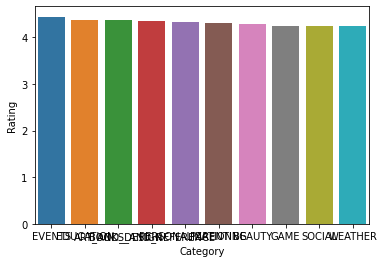

In [63]:
sns.barplot(x='Category', y='Rating', data= cat_rating_df)

In [64]:
cat_rating_df

,Category,Rating
0,EVENTS,4.435556
1,EDUCATION,4.364407
2,ART_AND_DESIGN,4.357377
3,BOOKS_AND_REFERENCE,4.344970
4,PERSONALIZATION,4.332215
5,PARENTING,4.300000
6,BEAUTY,4.278571
7,GAME,4.247645
8,SOCIAL,4.247291
9,WEATHER,4.243056


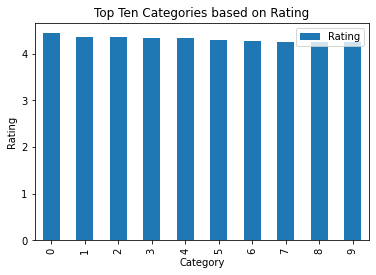

In [65]:
cat_rating_df.plot(kind = 'bar')
plt.rcParams['figure.figsize'] = (10,5)

plt.title('Top Ten Categories based on Rating')
plt.ylabel('Rating')
plt.xlabel('Category')

plt.show()

## **Genres vs Rating**

In [66]:
genre_rating_df = ps_df.groupby('Genres',as_index = True)['Rating'].mean().sort_values( ascending = False).head(10)

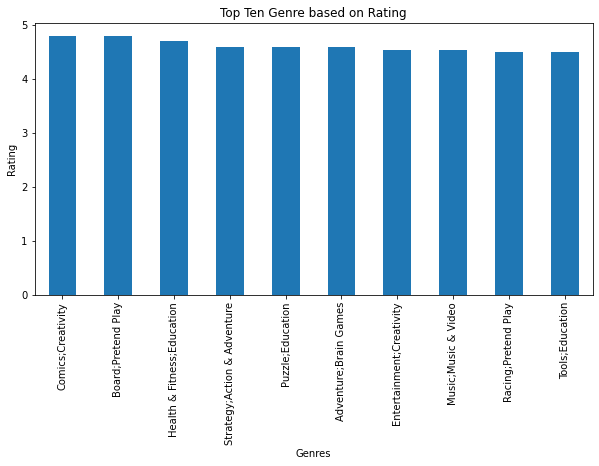

In [67]:
genre_rating_df.plot(kind = 'bar')
plt.rcParams['figure.figsize'] = (10,5)

plt.title('Top Ten Genre based on Rating')
plt.ylabel('Rating')
plt.xlabel('Genres')

plt.show()

App Type Distribution

In [68]:
free_app = (ps_df['Type'])

In [69]:
free_app.head()

0    Free
1    Free
2    Free
3    Free
4    Free
Name: Type, dtype: object

Text(0.5, 1.0, 'Distribution of App Types')

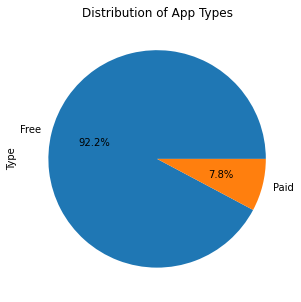

In [70]:
app_type_plot = free_app.value_counts().plot (kind = 'pie',autopct='%1.1f%%')
app_type_plot.set_title("Distribution of App Types")


## **Top Apps Based on Installs**